In [1]:
# importing importat libraries

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
import chardet
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Importing Data set

#### importing train dataset

In [2]:
# detecting file encoding
with open('train_data.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# importing dataset using pandas
train_data = pd.read_csv("train_data.csv",encoding=encoding)

#making copy of dataset so that we keep safe original data
train_data_original = train_data.copy()

In [3]:
# Overviewing the data
train_data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
train_data.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [5]:
train_data.info()

#As we can see in data set that no null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


As we can see we have three attributes in data that is 
1. ItemId
2. 2.Sentiment : 1- positive
                 0- Negative
3. SentimentText

#### importing test dataset

In [6]:
# detecting file encoding
with open('test_data.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# importing dataset using pandas
test_data = pd.read_csv("test_data.csv",encoding=encoding)

#making copy of dataset so that we keep safe original data
test_data_original = test_data.copy()

In [7]:
# overviewing test dataset

test_data.head()

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...


In [8]:
test_data.tail()

,ItemID,SentimentText
299984,299996,"@martine2323 'Morning, Petal - work brought me..."
299985,299997,"@martinetrene Hello,little bird! i finally st..."
299986,299998,@MartinezMayra I got u at work when I go buy o...
299987,299999,@martinfaux He certainly gives good interview
299988,300000,@martinfaux we've the feedback about our brows...


# Data Pre-processing


In [9]:
# combining both train and test dataset for data preprocessing

combine_dataset = pd.concat([train_data, test_data], ignore_index=True, sort=True)

In [10]:
combine_dataset.head()

,ItemID,Sentiment,SentimentText
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...


In [11]:
combine_dataset.tail()

#Columns not in the original dataframes
#are added as new columns and the new cells are populated with NaN value.

,ItemID,Sentiment,SentimentText
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...
399976,299999,NaN,@martinfaux He certainly gives good interview
399977,300000,NaN,@martinfaux we've the feedback about our brows...


#### Removing Twitter Handles(@User)

In [12]:
# defining function to remove pattern or twitter handles

def remove_handles(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)


     # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)

    return text

In [13]:
combine_dataset["Tidy_Tweets"] =np.vectorize(remove_handles)(combine_dataset['SentimentText'], "@[\w]*")

In [14]:
combine_dataset.head()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
0,1,0.0,is so sad for my APL frie...,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O,omg its already 7:30 :O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...


In [15]:
combine_dataset.tail()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...","'Morning, Petal - work brought me here (banki..."
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...","Hello,little bird! i finally started on Rick..."
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,I got u at work when I go buy one u know ima ...
399976,299999,NaN,@martinfaux He certainly gives good interview,He certainly gives good interview
399977,300000,NaN,@martinfaux we've the feedback about our brows...,we've the feedback about our browser compatib...


### Removing Punctuation, Numbers, and Special Characters

In [16]:
def remove_special_characters(text):
    # Define regex pattern to match any character that is not a letter or a space
    pattern = r'[^a-zA-Z\s]'
    # Use str.replace() method to replace matched characters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

In [17]:
combine_dataset['Tidy_Tweets'] = combine_dataset['Tidy_Tweets'].apply(remove_special_characters)

In [18]:
combine_dataset.head()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
0,1,0.0,is so sad for my APL frie...,is so sad for my APL friend
1,2,0.0,I missed the New Moon trail...,I missed the New Moon trailer
2,3,1.0,omg its already 7:30 :O,omg its already O
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...
4,5,0.0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT


In [19]:
combine_dataset.tail()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...",Morning Petal work brought me here banking I...
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...",Hellolittle bird i finally started on Ricks ...
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,I got u at work when I go buy one u know ima ...
399976,299999,NaN,@martinfaux He certainly gives good interview,He certainly gives good interview
399977,300000,NaN,@martinfaux we've the feedback about our brows...,weve the feedback about our browser compatibi...


### removing Stop words and short word

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Tokenize function to split text into words
def tokenize(text):
    return word_tokenize(text)
    
# defining function for removing stop words
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words
    
#defining function to remove short words
def remove_short_words(words, min_length=3):
    filtered_words = [word for word in words if len(word) >= min_length]
    return filtered_words

#defining combined function including above two function
def clean_text(text, min_length=3):
    words = tokenize(text)
    words = remove_stopwords(words)
    words = remove_short_words(words, min_length)
    return ' '.join(words)

In [22]:
combine_dataset["Tidy_Tweets"]=combine_dataset["Tidy_Tweets"].apply(clean_text)

In [23]:
combine_dataset.head()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
0,1,0.0,is so sad for my APL frie...,sad APL friend
1,2,0.0,I missed the New Moon trail...,missed New Moon trailer
2,3,1.0,omg its already 7:30 :O,omg already
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna CRy Ive dentist since supose...
4,5,0.0,i think mi bf is cheating on me!!! ...,think cheating


In [24]:
combine_dataset.tail()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...",Morning Petal work brought banking First Holla...
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...",Hellolittle bird finally started Ricks movie m...
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,got work buy one know ima get one
399976,299999,NaN,@martinfaux He certainly gives good interview,certainly gives good interview
399977,300000,NaN,@martinfaux we've the feedback about our brows...,weve feedback browser compatibility story loud...


### Tokenisation

In [25]:
tokenized_tweet = combine_dataset['Tidy_Tweets'].apply(lambda x: x.split())

In [26]:
tokenized_tweet.head()

0                                   [sad, APL, friend]
1                         [missed, New, Moon, trailer]
2                                       [omg, already]
3    [Omgaga, sooo, gunna, CRy, Ive, dentist, since...
4                                    [think, cheating]
Name: Tidy_Tweets, dtype: object

In [27]:
tokenized_tweet.tail()

399973    [Morning, Petal, work, brought, banking, First...
399974    [Hellolittle, bird, finally, started, Ricks, m...
399975           [got, work, buy, one, know, ima, get, one]
399976                  [certainly, gives, good, interview]
399977    [weve, feedback, browser, compatibility, story...
Name: Tidy_Tweets, dtype: object

### Stemming

In [28]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0                                   [sad, apl, friend]
1                           [miss, new, moon, trailer]
2                                       [omg, alreadi]
3    [omgaga, sooo, gunna, cri, ive, dentist, sinc,...
4                                       [think, cheat]
Name: Tidy_Tweets, dtype: object

In [29]:
tokenized_tweet.tail()

399973    [morn, petal, work, brought, bank, first, holl...
399974    [hellolittl, bird, final, start, rick, movi, m...
399975           [got, work, buy, one, know, ima, get, one]
399976                   [certainli, give, good, interview]
399977    [weve, feedback, browser, compat, stori, loud,...
Name: Tidy_Tweets, dtype: object

### combining these tokens together to form text

In [30]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine_dataset['Tidy_Tweets'] = tokenized_tweet
combine_dataset.head()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
0,1,0.0,is so sad for my APL frie...,sad apl friend
1,2,0.0,I missed the New Moon trail...,miss new moon trailer
2,3,1.0,omg its already 7:30 :O,omg alreadi
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cri ive dentist sinc supos g...
4,5,0.0,i think mi bf is cheating on me!!! ...,think cheat


In [31]:
combine_dataset.tail()

,ItemID,Sentiment,SentimentText,Tidy_Tweets
399973,299996,NaN,"@martine2323 'Morning, Petal - work brought me...",morn petal work brought bank first holland sta...
399974,299997,NaN,"@martinetrene Hello,little bird! i finally st...",hellolittl bird final start rick movi morn amp...
399975,299998,NaN,@MartinezMayra I got u at work when I go buy o...,got work buy one know ima get one
399976,299999,NaN,@martinfaux He certainly gives good interview,certainli give good interview
399977,300000,NaN,@martinfaux we've the feedback about our brows...,weve feedback browser compat stori loud clear


### Data Visualization

#### Now, we use Data Visualization as it is most important in Machine Learning project.

In [32]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### Generating Word cloud for tweets having postive such that sentiment = 1

In [33]:
all_words_positive = ' '.join(text for text in combine_dataset['Tidy_Tweets'][combine_dataset['Sentiment']==1])

In [34]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)


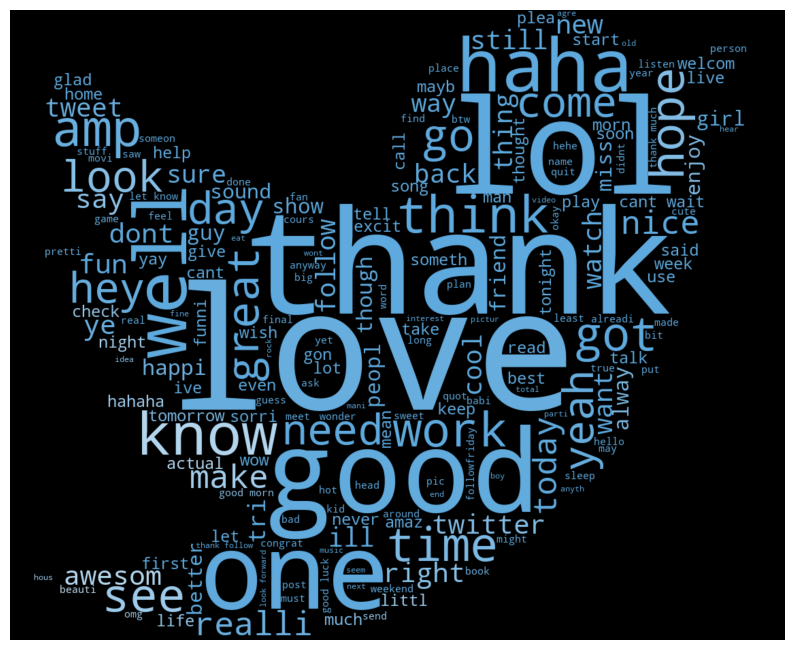

In [35]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

### Generating Word cloud for tweets having Negative such that sentiment = 0

In [36]:
all_words_negative = ' '.join(text for text in combine_dataset['Tidy_Tweets'][combine_dataset['Sentiment']==0])

In [37]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

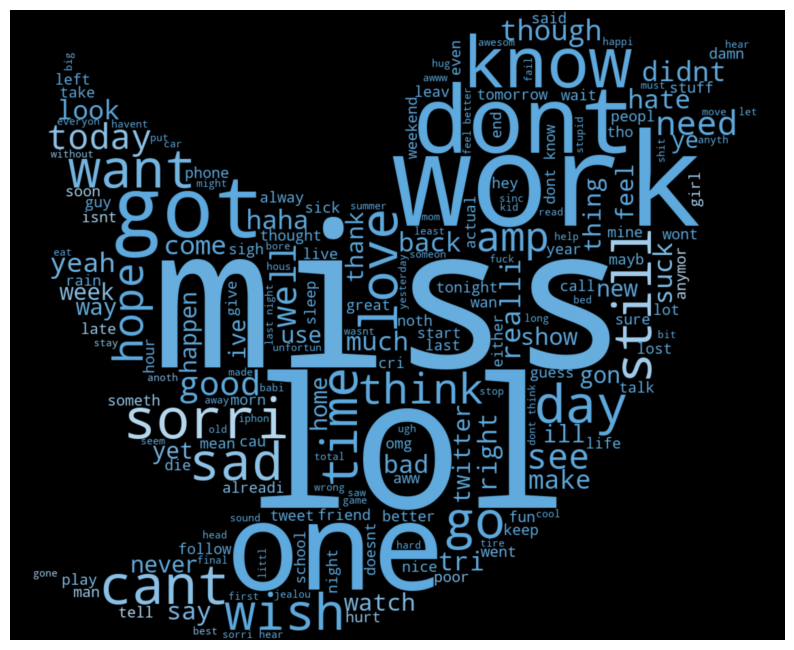

In [38]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

### Plotting Bar Plot for word in positive sentiments and their frequency distribution

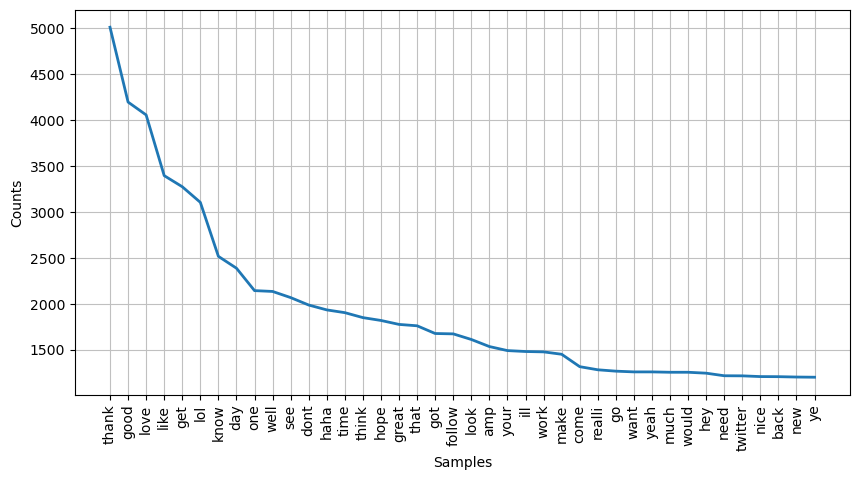

In [39]:
from nltk.probability import FreqDist

# Concatenate all text into a single string
positive_tweets = combine_dataset[combine_dataset["Sentiment"]==1]
all_text = ' '.join(positive_tweets['Tidy_Tweets'])
tokens = nltk.word_tokenize(all_text)
#Create frequency distribution
fdist = FreqDist(tokens)

# Plot frequency distribution
plt.figure(figsize=(10, 5))
fdist.plot(40, cumulative=False)
plt.show()

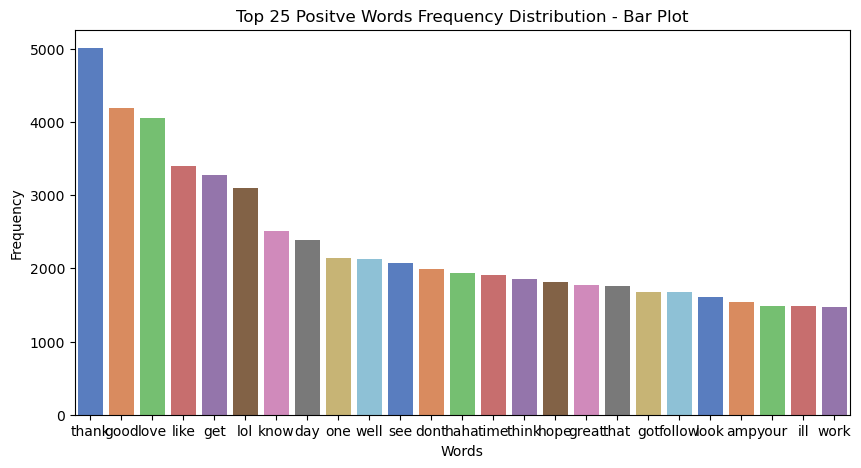

In [40]:
# Convert frequency distribution to a pandas DataFrame for easier plotting
import seaborn as sns
fdist_data = pd.DataFrame(list(fdist.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

#plotting bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Frequency', data=fdist_data.head(25), palette='muted')
plt.title('Top 25 Positve Words Frequency Distribution - Bar Plot')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

### Plotting Bar Plot for word in Negative sentiments and their frequency distribution

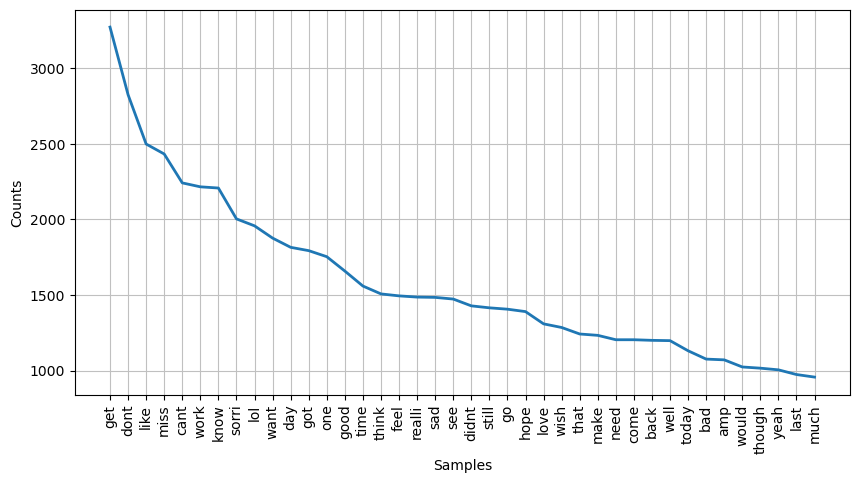

In [41]:
# Concatenate all text into a single string
negative_tweets = combine_dataset[combine_dataset["Sentiment"]==0]
all_text = ' '.join(negative_tweets['Tidy_Tweets'])
tokenss = nltk.word_tokenize(all_text)
#Create frequency distribution
fdist_neg = FreqDist(tokenss)

# Plot frequency distribution
plt.figure(figsize=(10, 5))
fdist_neg.plot(40, cumulative=False)
plt.show()

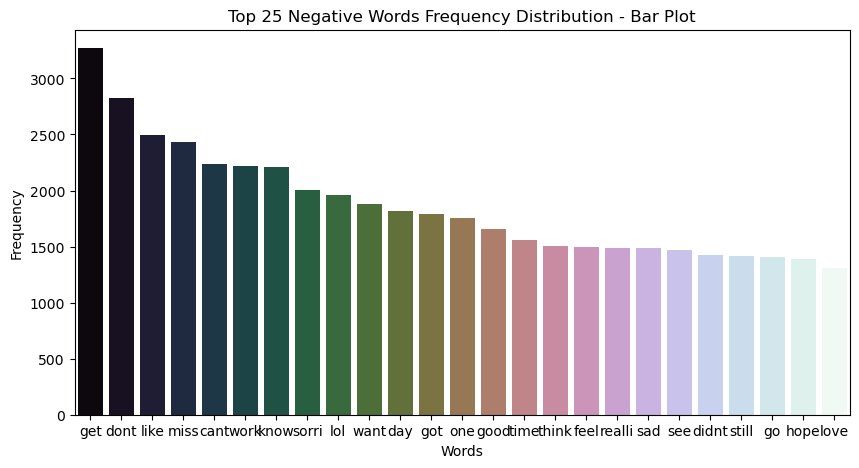

In [42]:
# Convert frequency distribution to a pandas DataFrame for easier plotting

fdist_neg_data = pd.DataFrame(list(fdist_neg.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

#plotting bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Word', y='Frequency', data=fdist_neg_data.head(25), palette='cubehelix')
plt.title('Top 25 Negative Words Frequency Distribution - Bar Plot')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.show()

## Extracting Feature from cleaned Tweets Using Bag of Words(BoW) and TF-IDF feature

### Bag of Words Feature

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')

# bag-of-words feature matrix
bow_matx = bow_vectorizer.fit_transform(combine_dataset['Tidy_Tweets'])

data_bow = pd.DataFrame(bow_matx.todense())
data_bow


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Feature - Term Frequency-Inverse Document Frequency

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=2000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine_dataset['Tidy_Tweets'])

data_tfidf = pd.DataFrame(tfidf_matrix.todense())

data_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* These are the Word Embedding techniques which we have used on our dataset for feature extraction.

## Splitting or Dataset into training and Validation set

### Bag of Words feature for training set


In [45]:
train_bow = bow_matx[:99989]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF Feature for training set

In [46]:
train_tfidf_matrix = tfidf_matrix[:99989]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### Bag of Words Feature splitting

In [48]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train_data['Sentiment'],test_size=0.3,random_state=2)

### TF-IDF Features splitting

In [49]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_data['Sentiment'],test_size=0.3,random_state=17)

## Applying Machine Learning
use different models to see which best fits our dataset and then we use that model for predicting results on the test data.

Here we will use 3 different models

    Logistic Regression
    XGBoost
    Decision Trees

**We will use F1 Score throughout to asses our model’s performance instead of accuracy.**

### Why F1 Score instead of Accuracy ?


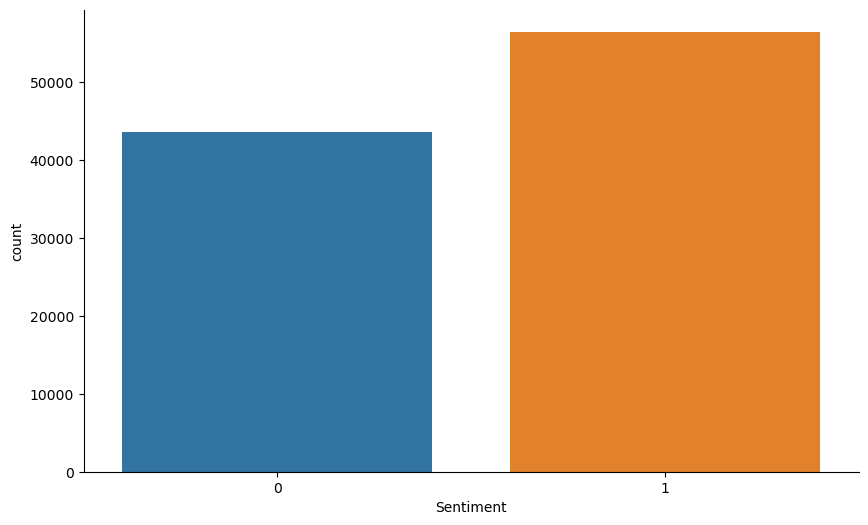

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data = train_data_original, x='Sentiment')
sns.despine()
plt.show()

* From the above countplot generated above we see how imbalanced our dataset is.We can see that the values with Positive — label : 1 sentiments are quite high in number as compared to the values with Negative — label : 0 sentiments.

* So when we keep Accuracy as our evaluation metric there may be cases where we may encounter high number of false positives. So that is why we use F1 Score as our evaluation metric instead of Accuracy.

### 1. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs', max_iter =135)

### For Bag of words feature: fitting model, predicting probablities and Calculating F1 Score using Logistic regression.

In [52]:
# Fitting the Logistic Regression Model.

Log_Reg.fit(x_train_bow,y_train_bow)

#Predicting the probabilities using validation dataset

prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[0.0582761 , 0.9417239 ],
       [0.30973015, 0.69026985],
       [0.52657955, 0.47342045],
       ...,
       [0.34126503, 0.65873497],
       [0.1659332 , 0.8340668 ],
       [0.03051792, 0.96948208]])

In [53]:
threshold = 0.3  # You can adjust this threshold based on your requirements
predicted_labels = (prediction_bow[:, 1] >= threshold).astype(int)  # Assuming 1 is the positive class

# Calculate F1 score
f1_score_bow = f1_score(y_valid_bow, predicted_labels)

print("F1 Score (Positive class=1, Negative class=0):", f1_score_bow)

F1 Score (Positive class=1, Negative class=0): 0.7774029108281824


### For TF-IDF feature: fitting model, predicting probablities and Calculating F1 Score using Logistic regression.

In [54]:
# fitting Model:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

# predicting the probablities
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.44176171, 0.55823829],
       [0.8168533 , 0.1831467 ],
       [0.70759904, 0.29240096],
       ...,
       [0.17536162, 0.82463838],
       [0.38565966, 0.61434034],
       [0.35637831, 0.64362169]])

In [55]:
# Convert probabilities to class labels using a threshold
threshold = 0.3  # You can adjust this threshold based on your requirements
predicted_labels_tfidf = (prediction_tfidf[:, 1] >= threshold).astype(int)

# Calculate the F1 score considering 1 as positive and 0 as negative
f1_score_tfidf = f1_score(y_valid_tfidf, predicted_labels_tfidf)

print("F1 Score (Positive class=1, Negative class=0):", f1_score_tfidf)

F1 Score (Positive class=1, Negative class=0): 0.7763039840927277


## 2. XGBoost

In [56]:
from xgboost import XGBClassifier

### For Bag of words feature: fitting model, predicting probablities and Calculating F1 Score using XGBoost.

In [57]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

# fitting XGBoost model
model_bow.fit(x_train_bow, y_train_bow)

# predicting the prob.
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[0.17569429, 0.8243057 ],
       [0.2897185 , 0.7102815 ],
       [0.85581326, 0.1441867 ],
       ...,
       [0.26969737, 0.73030263],
       [0.18422115, 0.81577885],
       [0.03527158, 0.9647284 ]], dtype=float32)

In [58]:
# Convert probabilities to class labels using a threshold
threshold = 0.3
predicted_labels_xgb = (xgb[:, 1] >= threshold).astype(int)

f1_score_xgb = f1_score(y_valid_bow, predicted_labels_xgb, pos_label=1)
print("F1 Score (Positive class=1, Negative class=0):", f1_score_xgb)

F1 Score (Positive class=1, Negative class=0): 0.7748389615459691


### For TF-IDF feature: fitting model, predicting probablities and Calculating F1 Score using XGBoost.

In [59]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

# Fitting the XGBoost model
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

# Predicting the probabilities.
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.3996573 , 0.6003427 ],
       [0.80875814, 0.19124186],
       [0.8254724 , 0.17452759],
       ...,
       [0.24917036, 0.75082964],
       [0.36910212, 0.6308979 ],
       [0.3996573 , 0.6003427 ]], dtype=float32)

In [64]:
# Convert probabilities to class labels using a threshold of 0.5
threshold = 0.3
predicted_labels_xgb_tfidf = (xgb_tfidf[:, 1] >= threshold).astype(int)  # Convert boolean to int

# Calculate the F1 score considering 1 as positive and 0 as negative
f1_score_xgb_tfidf = f1_score(y_valid_tfidf, predicted_labels_xgb_tfidf, pos_label=1)

print("F1 Score (Positive class=1, Negative class=0):", f1_score_xgb_tfidf)

F1 Score (Positive class=1, Negative class=0): 0.773779354620713


## 3. Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### For Bag of words feature: fitting model, predicting probablities and Calculating F1 Score using Decision Tree.

In [63]:
# Fitting the Decision Tree model.
dct.fit(x_train_bow,y_train_bow)

# Predicting the probabilities.
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[0.3       , 0.7       ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.11034483, 0.88965517],
       [0.        , 1.        ]])

In [65]:
threshold = 0.3
predicted_labels_dct_bow = (dct_bow[:, 1] >= threshold).astype(int)
f1_score_dct_bow = f1_score(y_valid_bow, predicted_labels_dct_bow, pos_label=1)
print("F1 Score (Positive class=1, Negative class=0):", f1_score_dct_bow)

F1 Score (Positive class=1, Negative class=0): 0.7269497640854843


### For TF-IDF feature: fitting model, predicting probablities and Calculating F1 Score using Decision Tree.

In [66]:
# fitting the decision tree model

dct.fit(x_train_tfidf,y_train_tfidf)

# Predicting the probabilities.

dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[0.75      , 0.25      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.39393939, 0.60606061]])

In [68]:
# Convert probabilities to class labels using a threshold of 0.5
threshold = 0.3
predicted_labels_dct_tfidf = (dct_tfidf[:, 1] >= threshold).astype(int)  # Convert boolean to int

# Calculate the F1 score considering 1 as positive and 0 as negative
f1_score_dct_tfidf = f1_score(y_valid_tfidf, predicted_labels_dct_tfidf, pos_label=1)

print("F1 Score (Positive class=1, Negative class=0):", f1_score_dct_tfidf)

F1 Score (Positive class=1, Negative class=0): 0.7241447275798959


# Model comparison
compare the different models we have applied on our dataset with different word embedding techniques.

### Bag of Words

In [69]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [f1_score_bow,f1_score_xgb,f1_score_dct_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.777403,0.774839,0.72695


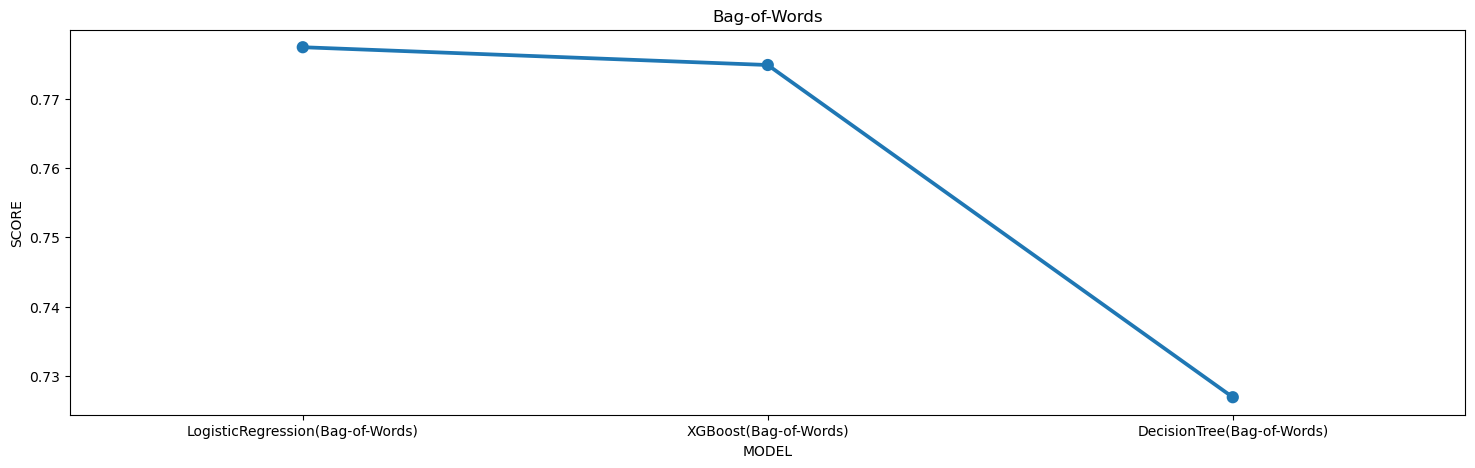

In [70]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

**Here Logistic regression is doing better than Decision tree and XGBoost in case of Bag of Words**

### TF-IDF

In [71]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [f1_score_tfidf,f1_score_xgb_tfidf,f1_score_dct_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.776304,0.773779,0.724145


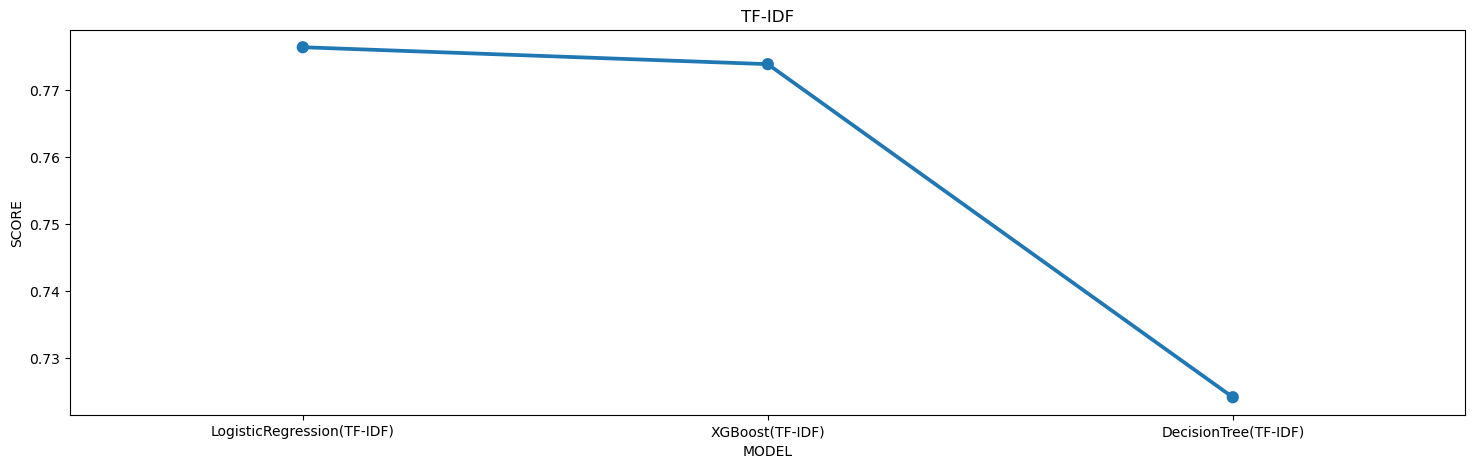

In [75]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

**Again,Here Logistic regression is doing better than Decision tree and XGBoost in case of TF-IDF**

**Now we compare score of logistic regression model with both feature extraction technique that is "Bag of words" and "TF-IDF"**

In [76]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [f1_score_bow ,f1_score_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.777403,0.776304


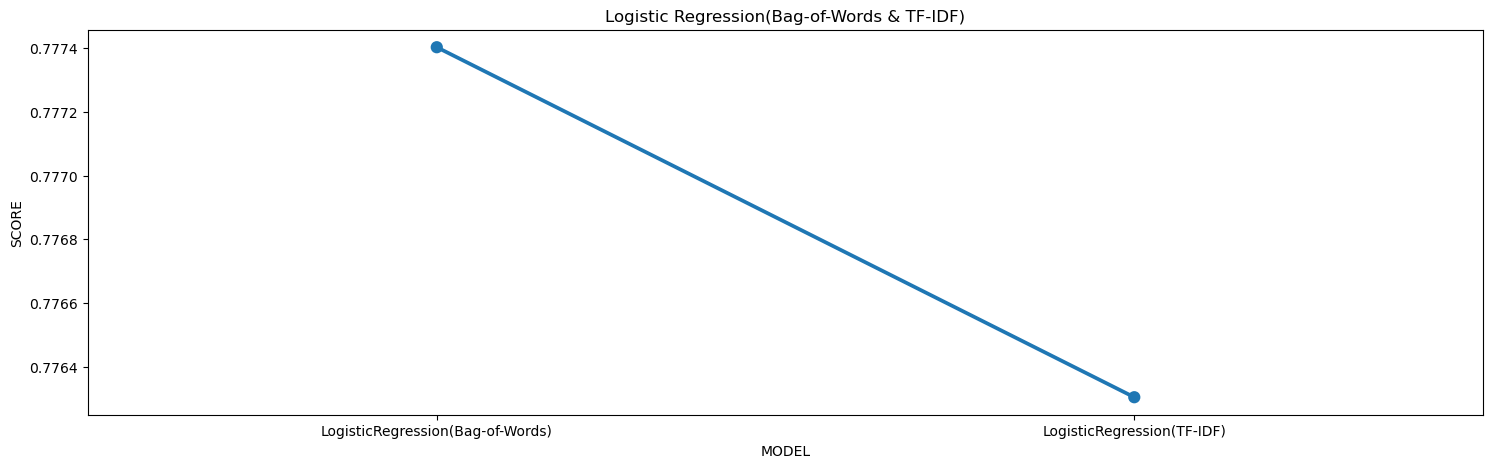

In [77]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

### Predicting the results for our test data

From the above comparison graph we can clearly see that the best possible F1 Score is obtained by the Logistic Regression Model using Bag of words features.

In [83]:
# predicting with Bag of words feature
test_tfidf = tfidf_matrix[99989:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)

test_data['Sentiment'] = test_pred_int

submission = test_data[['ItemID','SentimentText','Sentiment']]
submission.to_csv('result.csv', index=False)

## **Result After Prediction**

In [85]:
res = pd.read_csv('result.csv')
res

,ItemID,SentimentText,Sentiment
0,1,is so sad for my APL frie...,0
1,2,I missed the New Moon trail...,0
2,3,omg its already 7:30 :O,0
3,4,.. Omgaga. Im sooo im gunna CRy. I'...,0
4,5,i think mi bf is cheating on me!!! ...,1
...,...,...,...
299984,299996,"@martine2323 'Morning, Petal - work brought me...",1
299985,299997,"@martinetrene Hello,little bird! i finally st...",1
299986,299998,@MartinezMayra I got u at work when I go buy o...,1
299987,299999,@martinfaux He certainly gives good interview,1


## Conclusion: Social Media Sentiment Analysis with Logistic Regression

In this project, we conducted a sentiment analysis of social media data using a Logistic Regression model with Bag of Words (BoW) as the feature extraction technique. Here is a summary of our approach and findings:
Data Preprocessing

   * Data Collection: Social media data was collected, which included text from posts, tweets, or comments.
   * Text Cleaning: The text data was cleaned by removing punctuation, numbers, special characters, and stop words to focus on the most significant words.
    * Tokenization: The cleaned text was tokenized, converting the text into individual words or tokens.
   * Vectorization: We used the Bag of Words approach to convert the text data into numerical features suitable for machine learning.

### Model Training and Evaluation

    Model Selection: Logistic Regression was selected as the machine learning model due to its effectiveness in binary classification problems and interpretability.
    Training: The Logistic Regression model was trained on the training dataset using BoW features.
    Validation: The model was evaluated on a validation set to assess its performance.

### Model Performance

    Model: Logistic Regression with Bag of Words.
    Evaluation Metric: The primary metric for evaluation was the F1 score, which balances precision and recall, making it suitable for imbalanced datasets.
    F1 Score: The Logistic Regression model achieved an impressive F1 score of 0.777403.

### Interpretation of Results

    F1 Score: An F1 score of 0.777403 indicates that the Logistic Regression model is highly effective at identifying both positive and negative sentiments. The score suggests a good balance between precision (accuracy of positive predictions) and recall (coverage of actual positive instances).
    Sentiment Classification: The model reliably classifies the sentiment of social media posts, making it a valuable tool for understanding public opinion and sentiment.

### Implications

    Business Insights: Companies can utilize this sentiment analysis to gain insights into customer opinions and feedback. This information can drive marketing strategies, improve customer service, and inform product development.
    Social Media Monitoring: The model can be used for real-time monitoring of social media platforms, enabling organizations to quickly respond to trends or issues as they arise.

### Final Thoughts

The sentiment analysis model based on Logistic Regression with a Bag of Words approach, achieving an F1 score of 0.777403, demonstrates a robust capability to classify sentiments accurately in social media data. While there is always potential for further improvements, this model provides a solid foundation for practical applications in sentiment analysis.
Future Work

### Future enhancements could include:

   * Advanced Feature Extraction: Experimenting with more sophisticated NLP techniques such as TF-IDF, word embeddings (Word2Vec, GloVe), or contextual embeddings (BERT).
   * Model Tuning: Further tuning the hyperparameters of the Logistic Regression model or exploring other machine learning models and deep learning techniques.
  *  Dataset Expansion: Increasing the diversity and size of the dataset to improve the model's generalizability and robustness.
  *  Real-Time Analysis: Implementing the model in a real-time analysis pipeline to continuously monitor and analyze social media sentiment.

By leveraging these improvements, the sentiment analysis system can become even more accurate and valuable for various applications, providing deeper insights into social media sentiments.
